In [227]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data_Collection

In [9]:
loan_data=pd.read_csv('loan_approval_data.csv')
loan_data

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,8th,Yes,Business,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,8th,Yes,Business,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,8th,Yes,Business,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Graduate,No,Salaried,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [21]:
data=loan_data[['income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']]
data

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...
4264,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [22]:
data['total_assets']=data['residential_assets_value']+data['commercial_assets_value']+data['luxury_assets_value']+data['bank_asset_value']
data

C:\TEMP\ipykernel_5764\546155146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_assets']=data['residential_assets_value']+data['commercial_assets_value']+data['luxury_assets_value']+data['bank_asset_value']


,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,52700000
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,55000000
...,...,...,...,...,...,...,...,...,...
4264,1000000,2300000,12,317,2800000,500000,3300000,800000,7400000
4265,3300000,11300000,20,559,4200000,2900000,11000000,1900000,20000000
4266,6500000,23900000,18,457,1200000,12400000,18100000,7300000,39000000
4267,4100000,12800000,8,780,8200000,700000,14100000,5800000,28800000


In [23]:
data=data.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'])

In [24]:
data


,income_annum,loan_amount,loan_term,cibil_score,total_assets
0,9600000,29900000,12,778,50700000
1,4100000,12200000,8,417,17000000
2,9100000,29700000,20,506,57700000
3,8200000,30700000,8,467,52700000
4,9800000,24200000,20,382,55000000
...,...,...,...,...,...
4264,1000000,2300000,12,317,7400000
4265,3300000,11300000,20,559,20000000
4266,6500000,23900000,18,457,39000000
4267,4100000,12800000,8,780,28800000


In [25]:
data['loan_status']=loan_data['loan_status']
data

,income_annum,loan_amount,loan_term,cibil_score,total_assets,loan_status
0,9600000,29900000,12,778,50700000,Approved
1,4100000,12200000,8,417,17000000,Rejected
2,9100000,29700000,20,506,57700000,Rejected
3,8200000,30700000,8,467,52700000,Rejected
4,9800000,24200000,20,382,55000000,Rejected
...,...,...,...,...,...,...
4264,1000000,2300000,12,317,7400000,Rejected
4265,3300000,11300000,20,559,20000000,Approved
4266,6500000,23900000,18,457,39000000,Rejected
4267,4100000,12800000,8,780,28800000,Approved


# 2.Data_Preprosessing

In [26]:
data.isnull().sum()

income_annum    0
loan_amount     0
loan_term       0
cibil_score     0
total_assets    0
loan_status     0
dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
data.describe()

,income_annum,loan_amount,loan_term,cibil_score,total_assets
count,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03
mean,5.059124e+06,1.513345e+07,10.900445,599.936051,3.254877e+07
std,2.806840e+06,9.043363e+06,5.709187,172.430401,1.950656e+07
min,2.000000e+05,3.000000e+05,2.000000,300.000000,4.000000e+05
25%,2.700000e+06,7.700000e+06,6.000000,453.000000,1.630000e+07
50%,5.100000e+06,1.450000e+07,10.000000,600.000000,3.150000e+07
75%,7.500000e+06,2.150000e+07,16.000000,748.000000,4.720000e+07
max,9.900000e+06,3.950000e+07,20.000000,900.000000,9.070000e+07


,income_annum,loan_amount,loan_term,cibil_score,total_assets
income_annum,7.878350e+12,2.354222e+13,1.840974e+05,-1.114830e+07,5.102016e+13
loan_amount,2.354222e+13,8.178241e+13,4.356177e+05,-2.656321e+07,1.529549e+14
loan_term,1.840974e+05,4.356177e+05,3.259482e+01,7.688337e+00,1.128287e+06
cibil_score,-1.114830e+07,-2.656321e+07,7.688337e+00,2.973224e+04,-7.881881e+07
total_assets,5.102016e+13,1.529549e+14,1.128287e+06,-7.881881e+07,3.805060e+14


# 4. Exploratory Data Analysis (EDA)

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

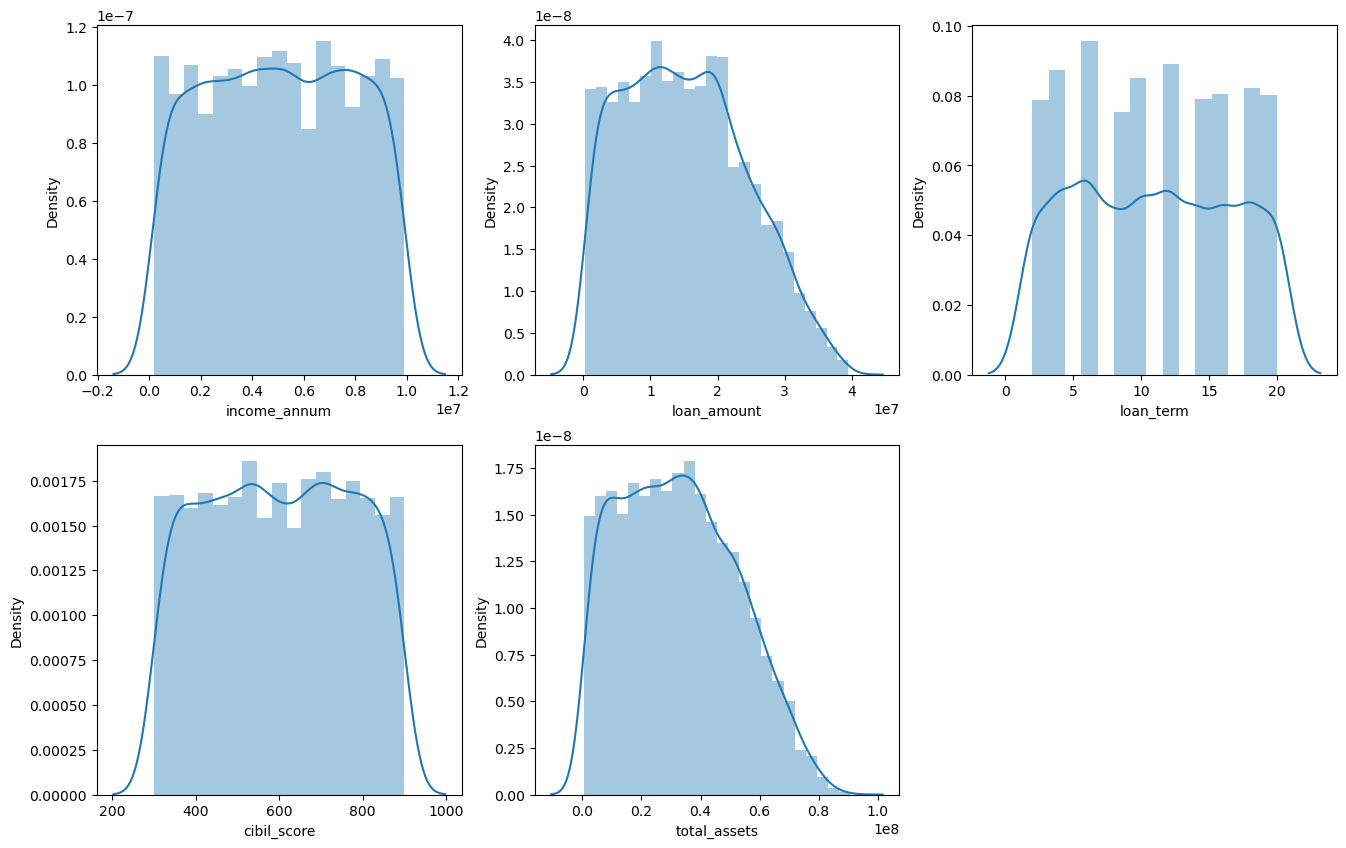

In [49]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.distplot(data['income_annum'])

plt.subplot(2,3,2)
sns.distplot(data['loan_amount'])

plt.subplot(2,3,3)
sns.distplot(data['loan_term'])

plt.subplot(2,3,4)
sns.distplot(data['cibil_score'])

plt.subplot(2,3,5)
sns.distplot(data['total_assets'])

plt.show()


In [55]:
#data['income_annum'].skew()
#data['loan_amount'].skew()
#data['loan_term'].skew()
#data['cibil_score'].skew()
#data['total_assets'].skew()

data['total_assets'].skew()

0.29724139686139023

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_assets'>

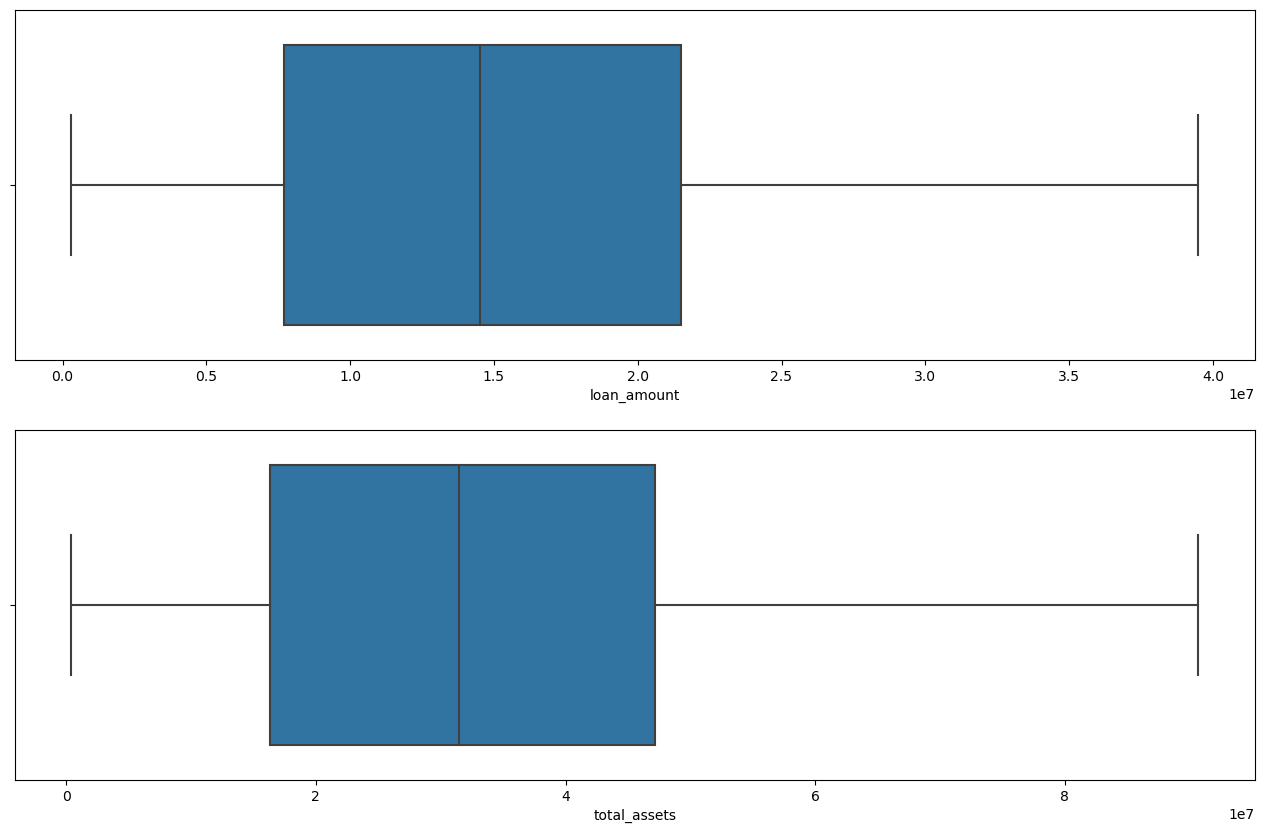

In [63]:
#Both loan_amount and total_assets are right skewed,so checking for outliers
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.boxplot(data['loan_amount'])
plt.subplot(2,1,2)
sns.boxplot(data['total_assets'])


# 5. Data Preparation

In [167]:
X=data.iloc[:,0:5]
y=data.iloc[:,-1]
y

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data.iloc[:,0:5],data.iloc[:,-1],test_size=0.2,random_state=20)

In [140]:
y_test

4040    Approved
773     Rejected
685     Approved
1907    Rejected
3907    Rejected
          ...   
624     Approved
3439    Rejected
913     Approved
4211    Approved
3735    Approved
Name: loan_status, Length: 854, dtype: object

In [138]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [141]:
y_train_le=le.transform(y_train)
y_test_le=le.transform(y_test)

In [209]:
y_test_le

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [102]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [103]:
X_train_scaled

,income_annum,loan_amount,loan_term,cibil_score,total_assets
0,-0.515382,-0.730390,1.602082,-0.023258,-0.501450
1,1.089704,1.470626,-0.858582,0.843854,1.421723
2,-1.621109,-1.526738,1.250559,0.947907,-1.493726
3,1.696070,1.913041,-1.561629,-0.318077,2.178717
4,1.339384,0.807003,0.547512,0.543255,1.217130
...,...,...,...,...,...
3410,1.731739,0.917607,0.899035,0.514351,1.902517
3411,-0.551051,-0.476001,0.547512,1.387244,-0.276398
3412,1.161041,1.846679,0.899035,1.271629,1.994584
3413,-1.335760,-1.349771,-0.858582,-0.682264,-1.278904


C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

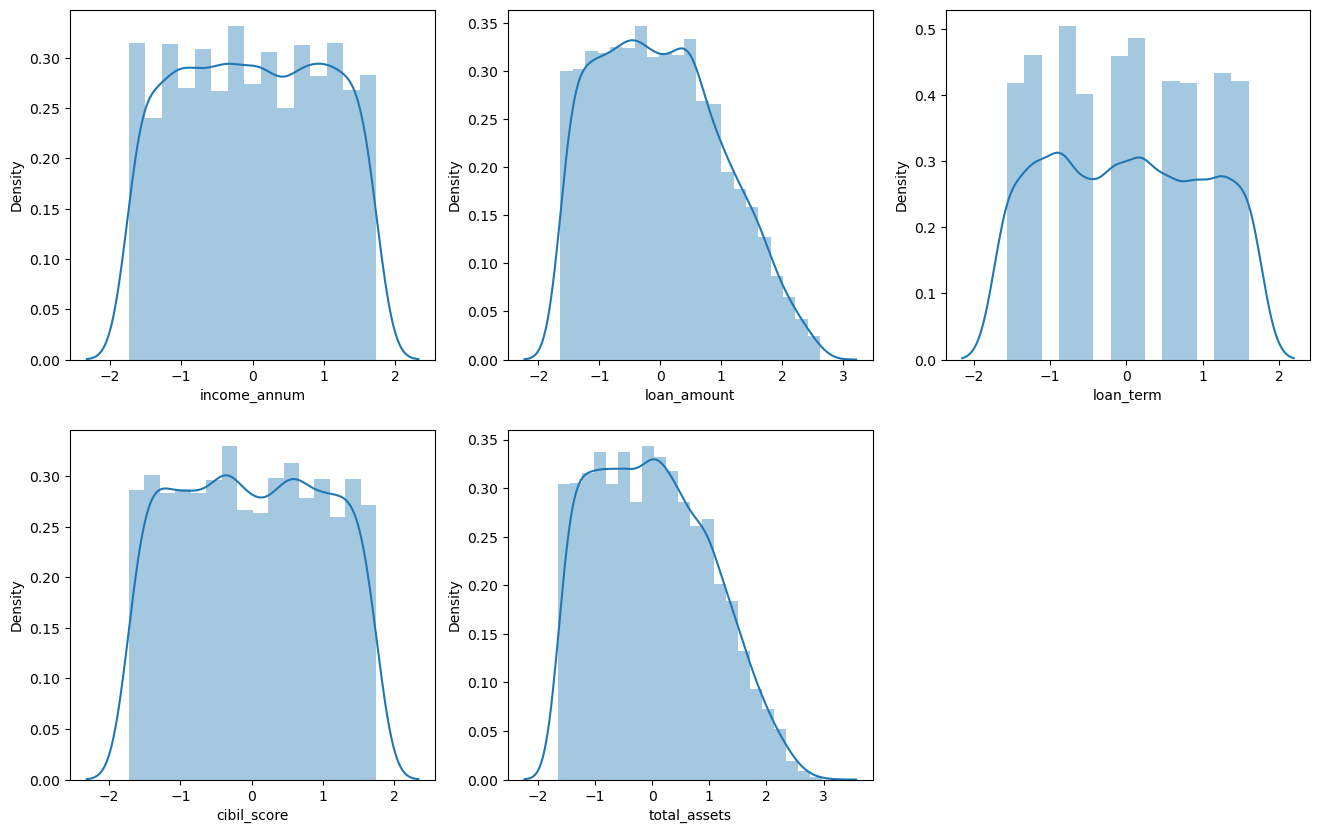

In [104]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.distplot(X_train_scaled['income_annum'])

plt.subplot(2,3,2)
sns.distplot(X_train_scaled['loan_amount'])

plt.subplot(2,3,3)
sns.distplot(X_train_scaled['loan_term'])

plt.subplot(2,3,4)
sns.distplot(X_train_scaled['cibil_score'])

plt.subplot(2,3,5)
sns.distplot(X_train_scaled['total_assets'])



plt.show()


In [105]:
np.round(X_train_scaled.describe(),2)

,income_annum,loan_amount,loan_term,cibil_score,total_assets
count,3415.00,3415.00,3415.00,3415.00,3415.00
mean,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.73,-1.64,-1.56,-1.72,-1.64
25%,-0.87,-0.83,-0.86,-0.86,-0.84
50%,-0.02,-0.07,-0.16,-0.01,-0.06
75%,0.88,0.71,0.90,0.86,0.76
max,1.73,2.62,1.60,1.75,2.98


# 6. Model Selection And Evaluation

In [144]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [145]:
lr.fit(X_train_scaled,y_train_le)

LogisticRegression()

In [146]:
y_predict=lr.predict(X_test_scaled)

In [147]:
from sklearn.metrics import accuracy_score

In [149]:
print(accuracy_score(y_test_le,y_predict))

0.9227166276346604


In [228]:
from sklearn.model_selection import cross_val_score
lr_cross=np.mean(cross_val_score(lr, X, y, cv=10, scoring='accuracy'))

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train_scaled,y_train_le)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test_le, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.9836065573770492


In [229]:
dt_cross=np.mean(cross_val_score(dt_model, X, y, cv=10, scoring='accuracy'))

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train_scaled,y_train_le)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test_le, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9836065573770492


In [230]:
rf_cross=np.mean(cross_val_score(rf_model, X, y, cv=10, scoring='accuracy'))

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=10)
gb_model.fit(X_train_scaled,y_train_le)
gb_predictions = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test_le, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Gradient Boosting Accuracy: 0.977751756440281


In [231]:
gb_cross=np.mean(cross_val_score(gb_model, X, y, cv=10, scoring='accuracy'))

In [154]:
from sklearn.svm import SVC
svm_model = SVC(random_state=10)
svm_model.fit(X_train_scaled,y_train_le)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test_le, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9590163934426229


In [232]:
svm_cross=np.mean(cross_val_score(svm_model, X, y, cv=10, scoring='accuracy'))

In [155]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled,y_train_le)
nb_predictions = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test_le, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

Naive Bayes Accuracy: 0.9391100702576113


In [233]:
nb_cross=np.mean(cross_val_score(nb_model, X, y, cv=10, scoring='accuracy'))

In [235]:
#Accuracies Of All Algorithms After Cross Validation
print(f"Logistic Regression Accuracy: {lr_cross}")
print(f"Decision Tree Accuracy: {dt_cross}")
print(f"Random Forest Accuracy: {rf_cross}")
print(f"Gradient Boosting Accuracy: {gb_cross}")
print(f"SVM Accuracy: {svm_cross}")
print(f"Naive Bayes Accuracy: {nb_cross}")



Logistic Regression Accuracy: 0.6458131301470023
Decision Tree Accuracy: 0.9857120867280184
Random Forest Accuracy: 0.9859462787654891
Gradient Boosting Accuracy: 0.9852442523996439
SVM Accuracy: 0.622159734362459
Naive Bayes Accuracy: 0.622159734362459


# 7. Hyperparameter Tuning Of Random Forest

In [182]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]


In [183]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples
    
}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [190]:
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator=rf_model,
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

In [191]:
rf_grid.fit(X_train_scaled,y_train_le)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [193]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [194]:
rf_grid.best_score_

0.9885797950219619

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf_final_model = RandomForestClassifier(n_estimators=100, max_depth=None,max_features=1.0, random_state=10,max_samples=1.0)
rf_final_model.fit(X_train_scaled,y_train_le)
rf_final_predictions = rf_final_model.predict(X_test_scaled)
rf_final_accuracy = accuracy_score(y_test_le, rf_final_predictions)
print(f"Random Forest Accuracy After Tuning: {rf_final_accuracy}")

Random Forest Accuracy After Tuning: 0.9871194379391101


In [198]:
np.mean(cross_val_score(rf_final_model, X, y, cv=10, scoring='accuracy'))

0.9889918747457422

# 8. Model Testing

In [223]:
def check_status(ia,la,lt,cs,ta):
    
    input_data = pd.DataFrame({
        'income_annum': [ia],
        'loan_amount': [la],
        'loan_term': [lt],
        'cibil_score': [cs],
        'total_assets': [ta]
    })
    standardized_data = scaler.transform(input_data)
    prediction = rf_final_model.predict(standardized_data)
    
    return 'Approved' if prediction[0] == 0 else 'Rejected'





Approved


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [226]:

income_annum = float(input("Enter annual income: "))
loan_amount = float(input("Enter loan amount: "))
loan_term = float(input("Enter loan term: "))
cibil_score = float(input("Enter CIBIL score: "))
total_assets = float(input("Enter total assets: "))


placement_prediction = check_status(income_annum,loan_amount,loan_term,cibil_score,total_assets)
print(placement_prediction)


Enter annual income: 3300000
Enter loan amount: 11300000
Enter loan term: 20
Enter CIBIL score: 559
Enter total assets: 20000000
Approved


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [201]:
data

,income_annum,loan_amount,loan_term,cibil_score,total_assets,loan_status
0,9600000,29900000,12,778,50700000,Approved
1,4100000,12200000,8,417,17000000,Rejected
2,9100000,29700000,20,506,57700000,Rejected
3,8200000,30700000,8,467,52700000,Rejected
4,9800000,24200000,20,382,55000000,Rejected
...,...,...,...,...,...,...
4264,1000000,2300000,12,317,7400000,Rejected
4265,3300000,11300000,20,559,20000000,Approved
4266,6500000,23900000,18,457,39000000,Rejected
4267,4100000,12800000,8,780,28800000,Approved
